<h1> 1- Setup virtual environment </h1>

<h1>2- Import all necessary libraries </h1>

In [1]:
%load_ext autoreload
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
import importlib

# my own modules
from text_processing import TextProcessing

tp = TextProcessing()

from model import TextModel
tm = TextModel()

[nltk_data] Downloading package stopwords to C:\Users\Amr
[nltk_data]     Ghrib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>3- Importing Data and Data Analysis </h1>

In [2]:
imdb_data=pd.read_csv('./IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.info()

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
#show the first 5 rows of the dataset
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h1>4- Preprocessing</h1>

In [4]:

imdb_data['review_processed']=imdb_data['review'].apply(lambda x: tp.denoise_text(x))


c:\Users\Amr Ghrib\Desktop\Sentiment\text_processing.py:40: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [5]:

#remove special characters and numbers
imdb_data['review_processed']=imdb_data['review_processed'].apply(lambda x: tp.remove_special_characters(x, remove_digits=True))

#text stemming
imdb_data['review_processed']=imdb_data['review_processed'].apply(lambda x: tp.simple_stemmer(x))

#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
imdb_data['review_processed']=imdb_data['review_processed'].apply(lambda x: tp.remove_stopwords(x, is_lower_case=True))

In [6]:

#split the dataset  
#train dataset
norm_train_reviews=imdb_data.review_processed[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
norm_test_reviews=imdb_data.review_processed[40000:]
test_sentiments=imdb_data.sentiment[40000:]

print(norm_train_reviews.shape)
print(train_sentiments.shape)
print(norm_test_reviews.shape)
print(test_sentiments.shape)


(40000,)
(40000,)
(10000,)
(10000,)


Bag of words Model<br>
It’s used to turn text files into numerical vectors or a bag of words.



In [7]:
#count vectorizer for bag of words
cv_train_reviews,cv_test_reviews = tp.create_bag_of_words(norm_train_reviews,norm_test_reviews)
print(cv_train_reviews.shape)
print(cv_test_reviews.shape)

(40000, 6983231)
(10000, 6983231)


Term Frequency-Inverse Document Frequency model (TFIDF)<br>
It is used to convert text documents to matrix of tfidf features.

In [8]:
tv_train_reviews,tv_test_reviews = tp.create_tfidf(norm_train_reviews,norm_test_reviews)
print(tv_train_reviews.shape)
print(tv_test_reviews.shape)

(40000, 6983231)
(10000, 6983231)


Labeling the sentiment text and splitting sentiment data



In [9]:
sentiment_data = tp.label_sentiment(imdb_data['sentiment'])
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments.shape)
print(test_sentiments.shape)
print(sentiment_data.shape)

(40000, 1)
(10000, 1)
(50000, 1)


<h1>5- Model Building</h1>

Training the model for both the approach both bag of words and tfidf features.



In [10]:
mnb_bow,mnb_tfidf,mnb = tm.create_model(cv_train_reviews,tv_train_reviews,train_sentiments)

c:\Users\Amr Ghrib\Desktop\Sentiment\env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Amr Ghrib\Desktop\Sentiment\env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting the model

In [11]:
mnb_bow_predict,mnb_tfidf_predict = tm.predict_model(mnb,cv_test_reviews,tv_test_reviews)

Accuracy Measurements

In [12]:
mnb_bow_report,mnb_tfidf_report,cm_bow,cm_tfidf,mnb_bow_score,mnb_tfidf_score = tm.measure_accuracy(test_sentiments,mnb_bow_predict,mnb_tfidf_predict)
print(mnb_bow_report)
print(mnb_tfidf_report)
print(cm_bow)
print(cm_tfidf)
print(mnb_bow_score)
print(mnb_tfidf_score)


              precision    recall  f1-score   support

    Positive       0.85      0.91      0.88      4993
    Negative       0.91      0.84      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4993
    Negative       0.90      0.88      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4218  789]
 [ 428 4565]]
[[4391  616]
 [ 492 4501]]
0.8783
0.8892


Plot Positive and Negative words cloud

In [13]:
norm_train_reviews[8]

'encourag posit comment thi film wa look forward watch thi film bad mistak ive seen 950 film thi truli one worst aw almost everi way edit pace storylin act soundtrack film onli song lame countri tune play less four time film look cheap nasti bore extrem rare happi see end credit film onli thing prevent give thi 1score harvey keitel thi far hi best perform least seem make bit effort one keitel obsess onli'

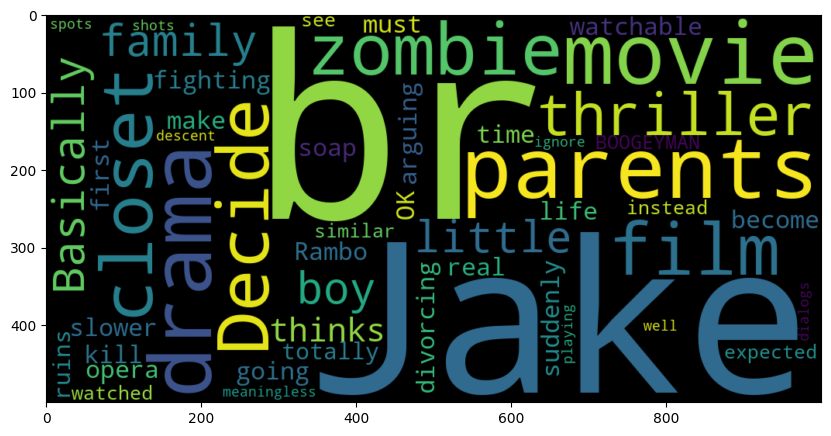

In [14]:
#get the index
negative_text = imdb_data['review'][imdb_data[imdb_data['sentiment']=='negative'].index[0]]
positive_text = imdb_data['review'][imdb_data[imdb_data['sentiment']=='positive'].index[0]]

#plot the word cloud for text that shows negative
tm.create_word_cloud(negative_text)


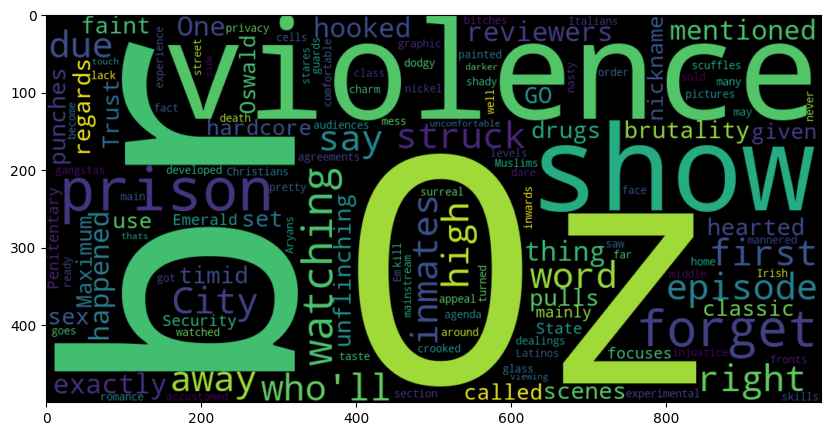

In [15]:
#plot the word cloud for text that shows positive
tm.create_word_cloud(positive_text)

In [16]:
#Save results to the pickel file to save time

import pickle
with open('model_results.pkl', 'wb') as f:
    pickle.dump(mnb, f)

f.close()
